<a href="https://colab.research.google.com/github/janzika/MATH5271/blob/main/MATH5271_Lab1_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH3041 Lab 1

# Introduction and Exploratory Data Analysis

Welcome to the 1st MATH5271 lab session. In this introductory lab we will get used to using python in the. cloud and download some environmental data and do some exploratory data anlysis. By the end of this lab you should be able to

- Download .csv data
- Visualise the data using matplotlib
- Compute a range of statistics and mathematically manipulate the data

## Google Colaboratory

We will run the python labs in [Google Colaboratory](colab.research.google.com). Google Colab is a web-based computational environment in which you can read, write, and execute interactive *notebooks* like the one you are reading. The python code runs on a virtual machine in the cloud, so you don't need to install python on your local machine. 

Before you begin the lab, you will need to [sign up](https://accounts.google.com/signup) for a free Google account. If you do not wish to sign up for a Google account, that's fine: you will still be able to read through the lab. You just won't be able to make edits or run any code. 

## Colaboratory and Google Drive

If you have a Google account, you can mount your Google drive within the Colab environment. This is not required to run the lab (figures and movies will be saved to the Colab virtual machine and played in your browser). But if you would like to save output you can do so by navigating to `drive/'My Drive'`

In [5]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/" "/content/"'

Mounted at /gdrive
/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


## 1. Setup

Before we get started analysing some data we need to ensure we have the appropriate 'libraries' installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) packkage to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. There are many other packages and libraries avaialble freely in python. We will experiment with a few in this course but will only really scratch the surface. I will try to keep things as simple as possible so we can focus on understanding - rather than trouble shooting technical issues.

In [6]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline
 

## 2. Loading Data

Environmental data can be stored and distributed in a range of formats, some of which we will explore during the course. The most simple formats though are ascii or csv (comma seperated values). Very often data for individual obesrvational stations are available to download as csv files. These can be downloaded directly into a notebook (often requiring some sort of account or password protection), kept on your own computer or, in the case of google colaboratory, kept in Google Drive. 

Here I have copied some of the example data tables from Wilks into csv files and am storing these on github.

We will load the data table as a pandas 'DataFrame'. This is a 2-dimensional data structure that can store data of different types and has inbuilt operations (like calcualting statistics and doing basic plots). 

Once we have loaded the data we will look at it and consider some of the most basic characteristics of the data.

In [7]:
# Define the URL where the data set is stored
TableA1_url = 'https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA1.csv' 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
TableA1 = pd.read_csv(TableA1_url)

# Let's look at all the data
pd.set_option('display.max_rows', 100) # Without this it will only show a few rows
display(TableA1) # Alternatively: print(TableA1)

,Year,Month,Date,Precip_inch,MaxTemp_Far,MinTemp_Far,Location
0,1987,1,1,0.00,33,19,Ithaca
1,1987,1,2,0.07,32,25,Ithaca
2,1987,1,3,1.11,30,22,Ithaca
3,1987,1,4,0.00,29,-1,Ithaca
4,1987,1,5,0.00,25,4,Ithaca
5,1987,1,6,0.00,30,14,Ithaca
6,1987,1,7,0.00,37,21,Ithaca
7,1987,1,8,0.04,37,22,Ithaca
8,1987,1,9,0.02,29,23,Ithaca
9,1987,1,10,0.05,30,27,Ithaca


In [8]:
# What data types are the different entries stored in?
TableA1.dtypes

Year             int64
Month            int64
Date             int64
Precip_inch    float64
MaxTemp_Far      int64
MinTemp_Far      int64
Location        object
dtype: object

In [9]:
# What are the unique loactions the rainfall is measured at
pd.unique(TableA1['Location'])

array(['Ithaca', 'Canandaigua'], dtype=object)

In [10]:
# Let's split these two stations up into two seperate tables
Ithaca_data = TableA1[TableA1['Location'].isin(['Ithaca'])]
display(Ithaca_data)
Canandaigua_data = TableA1[TableA1['Location'].isin(['Canandaigua'])]
display(Canandaigua_data)

,Year,Month,Date,Precip_inch,MaxTemp_Far,MinTemp_Far,Location
0,1987,1,1,0.00,33,19,Ithaca
1,1987,1,2,0.07,32,25,Ithaca
2,1987,1,3,1.11,30,22,Ithaca
3,1987,1,4,0.00,29,-1,Ithaca
4,1987,1,5,0.00,25,4,Ithaca
5,1987,1,6,0.00,30,14,Ithaca
6,1987,1,7,0.00,37,21,Ithaca
7,1987,1,8,0.04,37,22,Ithaca
8,1987,1,9,0.02,29,23,Ithaca
9,1987,1,10,0.05,30,27,Ithaca


,Year,Month,Date,Precip_inch,MaxTemp_Far,MinTemp_Far,Location
31,1987,1,1,0.00,34,28,Canandaigua
32,1987,1,2,0.04,36,28,Canandaigua
33,1987,1,3,0.84,30,26,Canandaigua
34,1987,1,4,0.00,29,19,Canandaigua
35,1987,1,5,0.00,30,16,Canandaigua
36,1987,1,6,0.00,35,24,Canandaigua
37,1987,1,7,0.02,44,26,Canandaigua
38,1987,1,8,0.05,38,24,Canandaigua
39,1987,1,9,0.01,31,24,Canandaigua
40,1987,1,10,0.09,33,29,Canandaigua


## 3. Computing Basic Statistics

In order to get a more quantitative understanding of our data we can compute various statistics such as the mean, stadnard deviation etc.

In python, like other scientific computing languages, you can do basic arithmatic. For example to compute you can write

In [16]:
1+1

2

Likewise there are some functions that is native to python like 'sum'. E.g.

In [17]:
sum([1,1])

2

Unlike other languages (e.g. R or Matlab) many basic functions are not available by default and these functions must be called from specified libraries. For example to compute the mean we can use 'mean' function from numpy (which above we have called 'np' for short). So

In [23]:
np.mean([1,3])

2.0

The Pandas DataFrame (like many other data structures) is more than just a table and has a lot of inbuilt functionality. For example it has it's own 'mean' and 'sum' functions which you can call using

In [26]:
Ithaca_data.mean()

Year           1987.000000
Month             1.000000
Date             16.000000
Precip_inch       0.101613
MaxTemp_Far      29.870968
MinTemp_Far      13.000000
dtype: float64

In [29]:
Ithaca_data.Precip_inch.sum()

3.1499999999999995

Pandas actually has a lot of really convenient features and statistics that are inbuilt, for example the 'describe' function

In [43]:
Ithaca_data.MaxTemp_Far.describe()

count    31.000000
mean     29.870968
std       7.714670
min       9.000000
25%      26.000000
50%      30.000000
75%      33.000000
max      53.000000
Name: MaxTemp_Far, dtype: float64

Let also compute the standard deviation using numpy.

In [44]:
np.std(Ithaca_data.MaxTemp_Far)

7.589219584528123

What is going on here? 

Recall Wilk's defenition of the 'sample standard deviation':

$$s = \sqrt{\frac{1}{n-1}\Sigma_{i=1}^{n} (x_i - \overline{x})^2}.$$

Wilks calls this the sample standard deviation. A common alternative is simply

$$\sigma = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n} (x_i - \overline{x})^2}.$$

We could look at the numpy and pandas documentation. But instead, let's compute these two and see which ones numpy and Pandas have chosen.

Note here we are using what is called [Markdown](https://www.markdownguide.org/) to render attractive equations. You can do this in line where `$x+y=z$` becomes $x+y=z$ and between lines so that 

```
$$f(b)-f(a) = \int_a^b f'(x)dx$$
```
becomes
$$f(b)-f(a) = \int_a^b f'(x)dx.$$


In [52]:
x_bar = np.mean(Ithaca_data.MaxTemp_Far)
n = np.size(Ithaca_data.MaxTemp_Far)
s = np.sqrt((1/(n-1))*np.sum((Ithaca_data.MaxTemp_Far-x_bar)**2))
sigma = np.sqrt((1/(n))*np.sum((Ithaca_data.MaxTemp_Far-x_bar)**2))
print(s)
print(sigma)

7.714669729305206
7.589219584528124


## 4. Plotting

To plot data in python there are various options. Some data formats like the pandas DataFrame haev inbuilt plotting functionality. For example

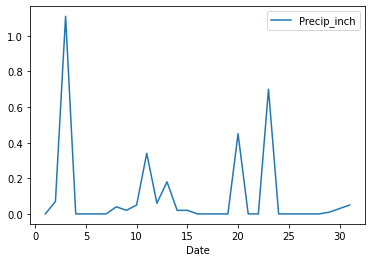

In [96]:
Ithaca_data.plot(x="Date",y="Precip_inch")

Notice that pandas has actually used matplotlib 'under the hood'. 
We can also create plots directly using matplotlib's pyplot package (recall we loaded this as `plt`).

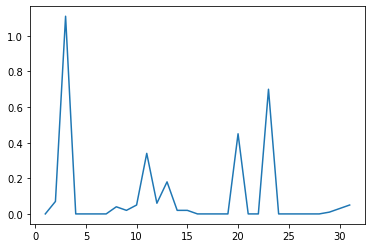

In [97]:
plt.plot(Ithaca_data.Date,Ithaca_data.Precip_inch)

Notice that pandas automatically creates the x-axis label and a legend. Consider this further example:


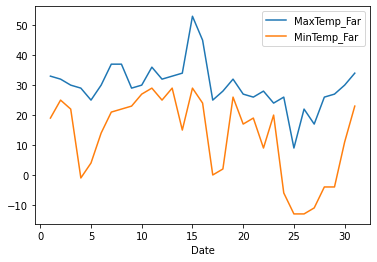

In [95]:
Ithaca_data.plot(x="Date",y={"MaxTemp_Far","MinTemp_Far"})

To create the same plot using matplotlib we'd need to write
```
plt.plot(Ithaca_data.Date,Ithaca_data.MaxTemp_Far,Ithaca_data.Date,Ithaca_data.MinTemp_Far)
plt.xlabel('Date')
plt.legend({"MaxTemp_Far","MinTemp_Far"})
```
Once you move beyond basic plots and really customise your graphs though the difference becomes negligible.

Lets plot a scatter plot of both Ithica and Canadagua max/min temperatures as well as the 1:1 line. 

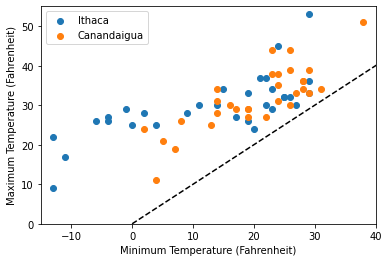

In [94]:
plt.scatter(Ithaca_data.MinTemp_Far,Ithaca_data.MaxTemp_Far,label="Ithaca")
plt.scatter(Canandaigua_data.MinTemp_Far,Canandaigua_data.MaxTemp_Far,label="Canandaigua")
plt.plot([-0,42],[0,42],dzvdzx'k--')
plt.axis([-15, 40,0,55])
plt.xlabel('Minimum Temperature (Fahrenheit)')
plt.ylabel('Maximum Temperature (Fahrenheit)')
plt.legend()

You can look at the content of the netcdf file imported by running the following line of code.

# 5. Exercise

----

Get into groups of 4-6 to explore the following version of the Canandaigua and Ithica meteorological data set

https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA1_uncorrected.csv

Load these data as above and experiement with different statistics and graphs in order to identify possible errors and consider possible causes.

Consider the different categories of QC checks proposed by the World Meteorological Organisation that we discussed in the W1 Discussion Session. E.g. syntax, impossible values, climatology checks, internal consistency, temporal and spatial gradient checks. 

Each group memeber should make one figure that identifies the error and would identify similar errors in such data. Feel free to get creative and consider different graphs and statistics proposed by Wilks. Please help each other find the best way to make the graphs and don't be afraid to ask memebers of you group for help - there is a lot of shared knowledge here.

After 30 minutes (or so) we will gather together and I'll ask each group to describe one error.

----

# 6. Extra

If everyone in your group is finished and getting bored here are a few things you can get started on:

 - Take a look at the other tables from Wilks 
 https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA2.csv
 https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA3.csv

 - Go to the Australian Buerau of Meterorlogy's website and download some recent rainfall and temperature data as a CSV. Here is one for a Hobart station:
 https://raw.githubusercontent.com/janzika/MATH5271/main/IDCJAC0009_094029_2020_Data.csv